## This code is used to load features form the training set and perform test on separate testset 

In [73]:
#import important functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix,roc_auc_score,classification_report
from sklearn.model_selection import StratifiedKFold, KFold,ShuffleSplit
from sklearn import preprocessing
from sklearn import utils
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [74]:
def load_RGB_train():
    
    # load RGB channel data
    data= pd.read_pickle('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/downsampled_image_RGB_32_2400.pkl')
    #replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 13 , 7 : 13, 8 : 14, 9 : 14, 10 : 14} # fuse the labels
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)
    
    # encode the label values into integer type
    #lab_enc = preprocessing.LabelEncoder()
    #Label = lab_enc.fit_transform(data['Dilution Factor'])
    Label= data['Dilution Factor'].values
    print(data['Dilution Factor'])
    
    feature_vector = data['Feature Vector']
    features=[]
    for f in feature_vector:
        #f = np.split(f, 2,axis=2)[1]
        #f = np.split(f, 2,axis=2)[1] - np.split(f, 2,axis=2)[0]
        features.append(f)
    features = np.array(features)
    #print (features)
    #features = (features-[20.289906, 20.289906, 20.289906,20.289906, 20.289906, 20.289906])/[53.41517,  55.18341,  62.164948,53.41517,  55.18341,  62.164948]
    print (features.shape)
    features = np.reshape(features,(features.shape[0],-1))
    print (features.shape)
    return Label, features


In [75]:
def load_HSV_train():
    
    # load RGB channel data
    data= pd.read_pickle('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/downsampled_image_HSV_32_2400.pkl')
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)

    # encode the label values into integer type
    #lab_enc = preprocessing.LabelEncoder()
    #Label = lab_enc.fit_transform(data['Dilution Factor'])
    Label= data['Dilution Factor'].values
    print(data['Dilution Factor'])
    
    feature_vector = data['Feature Vector']
    features=[]
    for f in feature_vector:
        #f = np.split(f, 2,axis=2)[1]
        #f = np.split(f, 2,axis=2)[1] - np.split(f, 2,axis=2)[0]
        features.append(f)
    features = np.array(features)
    features = np.reshape(features,(features.shape[0],-1))
    print (features.shape)
    #print (features)

    return Label, features


In [76]:
def load_LAB_train():
    
    # load RGB channel data
    data= pd.read_pickle('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/downsampled_image_LAB_32_2400.pkl')
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)

    # encode the label values into integer type
    #lab_enc = preprocessing.LabelEncoder()
    #Label = lab_enc.fit_transform(data['Dilution Factor'])
    Label= data['Dilution Factor'].values
    print(data['Dilution Factor'])
    
    feature_vector = data['Feature Vector']
    features=[]
    for f in feature_vector:
        #f = np.split(f, 2,axis=2)[1]
        #f = np.split(f, 2,axis=2)[1] - np.split(f, 2,axis=2)[0]
        features.append(f)
    features = np.array(features)
    features = np.reshape(features,(features.shape[0],-1))
    print (features.shape)
    #print (features)

    return Label, features


In [77]:
def load_RGB_test():
    
    # load RGB channel data
    data= pd.read_pickle('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/downsampled_image_RGB_32_600.pkl')
    #data = data.loc[(data['Dilution Factor']==1) | (data['Dilution Factor']==6)|(data['Dilution Factor']==9)|(data['Dilution Factor']==10)]
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)
    
    # encode the label values into integer type
    #lab_enc = preprocessing.LabelEncoder()
    #Label = lab_enc.fit_transform(data['Dilution Factor'])
    Label= data['Dilution Factor'].values
    print (Label)
    
    feature_vector = data['Feature Vector']
    features=[]
    for f in feature_vector:
        #f = np.split(f, 2,axis=2)[1]
        #f = np.split(f, 2,axis=2)[1] - np.split(f, 2,axis=2)[0]
        features.append(f)
    features = np.array(features)
    #print (features)
    #features = (features-[20.289906, 20.289906, 20.289906,20.289906, 20.289906, 20.289906])/[53.41517,  55.18341,  62.164948, 53.41517,  55.18341,  62.164948]
    print (features.shape)
    features = np.reshape(features,(features.shape[0],-1))
    print (features.shape)
    
    return Label, features

In [78]:
def load_HSV_test():
    
    # load RGB channel data
    data= pd.read_pickle('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/downsampled_image_HSV_32_600.pkl')
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)

    # encode the label values into integer type
    #lab_enc = preprocessing.LabelEncoder()
    #Label = lab_enc.fit_transform(data['Dilution Factor'])
    Label= data['Dilution Factor'].values
    print (Label)
    
    feature_vector = data['Feature Vector']
    features=[]
    for f in feature_vector:
        #f = np.split(f, 2,axis=2)[1]
        #f = np.split(f, 2,axis=2)[1] - np.split(f, 2,axis=2)[0]
        features.append(f)
    features = np.array(features)
    #print (features)
    print (features.shape)
    features = np.reshape(features,(features.shape[0],-1))
    print (features.shape)

    return Label, features

In [79]:
def load_LAB_test():
    
    # load RGB channel data
    data= pd.read_pickle('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/downsampled_image_LAB_32_600.pkl')
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)

    # encode the label values into integer type
    lab_enc = preprocessing.LabelEncoder()
    #Label = lab_enc.fit_transform(data['Dilution Factor'])
    Label= data['Dilution Factor'].values
    print (Label)
    
    feature_vector = data['Feature Vector']
    features=[]
    for f in feature_vector:
        #f = np.split(f, 2,axis=2)[1]
        #f = np.split(f, 2,axis=2)[1] - np.split(f, 2,axis=2)[0]
        features.append(f)
    features = np.array(features)
    #print (features)
    print (features.shape)
    features = np.reshape(features,(features.shape[0],-1))
    print (features.shape)

    return Label, features

In [80]:
def load_RGB_train_mean():
    # load RGB channel data
    data= pd.read_csv('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/mean_pixel_RGB_2400.csv')
    #data= pd.read_csv('C:/Users/Brinda Khanal/Desktop/Food Color Constant Distance and plane of angle/Outdoor_Sunlight/Labels.csv')
    #data = data[(data['Camera']==1)]
    #print (data)
    
    #data = data[(data['Dilution Factor']==1) | (data['Dilution Factor']==3) | (data['Dilution Factor']==5) | (data['Dilution Factor']==7) | (data['Dilution Factor']==10)]
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)
    
    
    # encode the label values into integer type
    lab_enc = preprocessing.LabelEncoder()
    encoded = lab_enc.fit_transform(data['Dilution Factor'])
    Dilution_Factor= pd.DataFrame(encoded,columns= ['Label'])

    # in each channel, calculate "sample-reference" values

    data['Diff_Red']= data['RedSample']-data['RedReference']
    data['Diff_Green']= data['GreenSample']-data['GreenReference']
    data['Diff_Blue']= data['BlueSample']-data['BlueReference']

    Diff_values= data[['Diff_Red','Diff_Green','Diff_Blue']]
    values= data[['BlueReference','BlueSample','GreenReference','GreenSample','RedReference','RedSample']]
    Sample_values= data[['BlueSample','GreenSample','RedSample']]
    
    #values = (values- [9.08283115,  71.20775448, 124.16239099, 156.00875213, 177.02573369, 171.91121167])/[ 8.08678345, 51.96839949, 29.57453969, 31.35167548, 29.29973181, 29.4546092 ]
    #values = (values- [  6.9093393,71.50616576,126.03038881,156.26470345,177.47429294,170.12119947])/[ 6.94030524, 54.70923893, 28.33589323, 29.99344325, 27.186746,   27.60145265]
    return Dilution_Factor, values

In [81]:
def load_HSV_train_mean():
    # load RGB channel data
    data= pd.read_csv('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/mean_pixel_HSV_2400.csv')
    #data= pd.read_csv('C:/Users/Brinda Khanal/Desktop/Food Color Constant Distance and plane of angle/Outdoor_Sunlight/Labels.csv')
    #data = data[(data['Camera']==1)]
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)


    # encode the label values into integer type
    lab_enc = preprocessing.LabelEncoder()
    encoded = lab_enc.fit_transform(data['Dilution Factor'])
    Dilution_Factor= pd.DataFrame(encoded,columns= ['Label'])

    # in each channel, calculate "sample-reference" values

    data['Diff_H']= data['HSample']-data['HReference']
    data['Diff_S']= data['SSample']-data['SReference']
    data['Diff_V']= data['VSample']-data['VReference']

    Diff_values= data[['Diff_H','Diff_S','Diff_V']]
    values= data[['HReference','HSample','SReference','SSample','VReference','VSample']]
    Sample_values= data[['HSample','SSample','VSample']]

    return Dilution_Factor, values

In [82]:
def load_LAB_train_mean():
    # load RGB channel data
    data= pd.read_csv('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/mean_pixel_LAB_2400.csv')
    #data= pd.read_csv('C:/Users/Brinda Khanal/Desktop/Food Color Constant Distance and plane of angle/Outdoor_Sunlight/Labels.csv')
    #data = data[(data['Camera']==1)]
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)

    # encode the label values into integer type
    lab_enc = preprocessing.LabelEncoder()
    encoded = lab_enc.fit_transform(data['Dilution Factor'])
    Dilution_Factor= pd.DataFrame(encoded,columns= ['Label'])

    # in each channel, calculate "sample-reference" values

    data['Diff_L']= data['LReference']-data['LSample']
    data['Diff_a']= data['aReference']-data['aSample']
    data['Diff_b']= data['bReference']-data['bSample']

    Diff_values= data[['Diff_L','Diff_a','Diff_b']]
    values = data [['LReference','LSample','aReference','aSample','bReference','bSample']]
    Sample_values= data[['LSample','aSample','bSample']]

    return Dilution_Factor, values

In [83]:
def load_RGB_test_mean():
    # load RGB channel data
    data= pd.read_csv('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/mean_pixel_RGB_600.csv')
    
    #data= pd.read_csv('C:/Users/Brinda Khanal/Desktop/Food Color Constant Distance and plane of angle/Indoor_Daylight_Closed_Curtains/Labels.csv')
    #data = data[(data['Camera']==2)]
    #data = data[(data['Dilution Factor']==1) | (data['Dilution Factor']==3) | (data['Dilution Factor']==5) | (data['Dilution Factor']==7) | (data['Dilution Factor']==10)]
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)
    
    
    # encode the label values into integer type
    lab_enc = preprocessing.LabelEncoder()
    encoded = lab_enc.fit_transform(data['Dilution Factor'])
    Dilution_Factor= pd.DataFrame(encoded,columns= ['Label'])

    # in each channel, calculate "sample-reference" values

    data['Diff_Red']= data['RedSample']-data['RedReference']
    data['Diff_Green']= data['GreenSample']-data['GreenReference']
    data['Diff_Blue']= data['BlueSample']-data['BlueReference']

    Diff_values= data[['Diff_Red','Diff_Green','Diff_Blue']]
    values= data[['BlueReference','BlueSample','GreenReference','GreenSample','RedReference','RedSample']]
    Sample_values= data[['BlueSample','GreenSample','RedSample']]
    
    #values = (values- [9.08283115,  71.20775448, 124.16239099, 156.00875213, 177.02573369, 171.91121167])/[ 8.08678345, 51.96839949, 29.57453969, 31.35167548, 29.29973181, 29.4546092 ]
    #values = (values- [  6.9093393,71.50616576,126.03038881,156.26470345,177.47429294,170.12119947])/[ 6.94030524, 54.70923893, 28.33589323, 29.99344325, 27.186746,   27.60145265]
    return Dilution_Factor, values

In [84]:
def load_HSV_test_mean():
    # load RGB channel data
    data= pd.read_csv('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/mean_pixel_HSV_600.csv')
    
    #data= pd.read_csv('C:/Users/Brinda Khanal/Desktop/Food Color Constant Distance and plane of angle/Indoor_Daylight_Closed_Curtains/Labels.csv')
    #data = data[(data['Camera']==2)]
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)

    # encode the label values into integer type
    lab_enc = preprocessing.LabelEncoder()
    encoded = lab_enc.fit_transform(data['Dilution Factor'])
    Dilution_Factor= pd.DataFrame(encoded,columns= ['Label'])

    # in each channel, calculate "sample-reference" values

    data['Diff_H']= data['HSample']-data['HReference']
    data['Diff_S']= data['SSample']-data['SReference']
    data['Diff_V']= data['VSample']-data['VReference']

    Diff_values= data[['Diff_H','Diff_S','Diff_V']]
    values= data[['HReference','HSample','SReference','SSample','VReference','VSample']]
    Sample_values= data[['HSample','SSample','VSample']]

    return Dilution_Factor, values

In [85]:
def load_LAB_test_mean():
    # load RGB channel data
    data= pd.read_csv('C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/new data/mean_pixel_LAB_600.csv')
    
    
    #data= pd.read_csv('C:/Users/Brinda Khanal/Desktop/Food Color Constant Distance and plane of angle/Indoor_Daylight_Closed_Curtains/Labels.csv')
    #data = data[(data['Camera']==2)]
    replace_values= { 1:11, 2 : 11, 3 : 11, 4 : 12, 5 : 12, 6 : 12 , 7 : 12, 8 : 13, 9 : 13, 10 : 13} # fuse the labels
    data.replace({'Dilution Factor' : replace_values}, inplace = True)

    # encode the label values into integer type
    lab_enc = preprocessing.LabelEncoder()
    encoded = lab_enc.fit_transform(data['Dilution Factor'])
    Dilution_Factor= pd.DataFrame(encoded,columns= ['Label'])

    # in each channel, calculate "sample-reference" values

    data['Diff_L']= data['LReference']-data['LSample']
    data['Diff_a']= data['aReference']-data['aSample']
    data['Diff_b']= data['bReference']-data['bSample']

    Diff_values= data[['Diff_L','Diff_a','Diff_b']]
    values = data [['LReference','LSample','aReference','aSample','bReference','bSample']]
    Sample_values= data[['LSample','aSample','bSample']]

    return Dilution_Factor, values

In [86]:
def load_pickle():
    
    data = pd.read_pickle("C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/Data/Data_BGR_downsampled_new.pkl")   
    Label_data= pd.read_excel("C:/Users/Brinda Khanal/Desktop/All images/Labels.xlsx") #label for each image
    
    df= pd.DataFrame()
    
    # encode the label values into integer type
    lab_enc = preprocessing.LabelEncoder()
    encoded = lab_enc.fit_transform(Label_data['Dilution Factor'])
    #print (encoded)
    
    # add a label column for encoded label in original dataframe
    data['Label']=encoded
    
    
    ### codes that may be useful later
    #k= np.concatenate(data['BGR_Sample'].values, axis=1).mean(0).reshape(data['BGR_Sample'].shape[0], -1)
    #mean= data['Label'].apply(np.mean, axis=0)
    ### np.vstack could come handy
    #print (data['BGR_Sample'])
    
   
    ## compute the mean of BGR_Reference values across rows
    mean_list= []
    for value in data['BGR_Reference'].values:
        m = np.mean(value, axis=0)
        mean_list.append(m)
    #print (mean_list)
     
    
    for feature,label,m in zip(data['BGR_Sample'].values, data['Label'].values,mean_list):
        Diff = pd.DataFrame(feature,columns=['Blue', 'Green','Red'])-m # for each BGR_Sample, compute BGR_Sample - BGR_Reference mean, across row
        Diff['Label']=int(label)
        df= df.append(Diff,ignore_index=True)
          
    #print (df)
    
    return df['Label'], df[['Blue','Green','Red']]

In [87]:
#### function to plot confusion matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    #transpose the matrix to make x-axis True Class and Y-axis Predicted Class
    cm= np.transpose(cm)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[0]),
           yticks=np.arange(cm.shape[1]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           
           #here we are not printing the title
           #title=title,
           xlabel='True label',
           ylabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return fig,ax


In [88]:
##### this function classifies the data using the logistic function and returns the predicition value, here stratified k-fold validation has been used 
def Logistic_Regression( Labels,Values,Labels_test, Values_test, colorspace ="RGB"):
  
    lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000, random_state=42)
    lr.fit(Values,Labels)
    Accuracy= accuracy_score(Labels_test,lr.predict(Values_test))
    print ("Accuracy Score: ", Accuracy)
    print(classification_report(Labels_test,lr.predict(Values_test), target_names=["1","2","3"]))
    fig,ax= plot_confusion_matrix(Labels_test,lr.predict(Values_test), classes=[1,2,3],title='Confusion matrix, Logistic Regression '+colorspace)
    plt.show()
    filename = "C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/new figures/Logistic_Reg_test_mean_" +colorspace+".png"
    fig.savefig(filename)
    return Accuracy

In [89]:
##### this function classifies the data using the logistic function and returns the predicition value, here stratified k-fold validation has been used 
def SVM( Labels,Values,Labels_test, Values_test, colorspace ="RGB"):
  
    clf = SVC(kernel='linear', gamma='scale',degree=3, random_state=42)
    clf.fit(Values,Labels)
    Accuracy= accuracy_score(Labels_test,clf.predict(Values_test))
    print ("Accuracy Score: ", Accuracy)
    print(classification_report(Labels_test,clf.predict(Values_test), target_names=["1","2","3"]))
    fig,ax= plot_confusion_matrix(Labels_test,clf.predict(Values_test), classes=[1,2,3],title='Confusion matrix, SVM '+colorspace)
    plt.show()
    filename = "C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/new figures/SVM_test_mean_" +colorspace+".png"
    fig.savefig(filename)
    return Accuracy

In [90]:
##### this function classifies the data using the logistic function and returns the predicition value, here stratified k-fold validation has been used 
def Random_Forrest( Labels,Values,Labels_test, Values_test, colorspace ="RGB"):
  
    clf = RandomForestClassifier(n_estimators=1000, max_depth= None,random_state=42)
    clf.fit(Values,Labels)
    Accuracy= accuracy_score(Labels_test,clf.predict(Values_test))
    print ("Accuracy Score: ", Accuracy)
    print(classification_report(Labels_test,clf.predict(Values_test), target_names=["1","2","3"]))
    fig,ax= plot_confusion_matrix(Labels_test,clf.predict(Values_test), classes=[1,2,3],title='Confusion matrix, Random Forrest '+colorspace)
    plt.show()
    filename = "C:/Users/Brinda Khanal/Documents/Bidur Git Repo/padColorimetry/new figures/RandomForest_test_mean_" +colorspace+".png"
    fig.savefig(filename)
    return Accuracy

In [91]:
def save_csv(accuracy,csv_file,remarks):
    df_list = []
    df_list.extend([accuracy,remarks])
    print (df_list)
    df=pd.DataFrame(columns=['avg_accuracy','remarks'], data=[df_list])
    print (df)
    with open(csv_file, 'a') as f:
        df.to_csv(f, index= False, header=f.tell()==0)
    

For RGB color space
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 16, 16, 6)
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12
 12 12 12

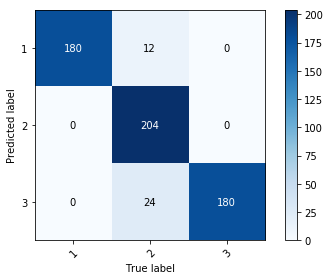

[0.94, 'RGB,Logistic Regression']
   avg_accuracy                  remarks
0          0.94  RGB,Logistic Regression
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 16, 16, 6)
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 1

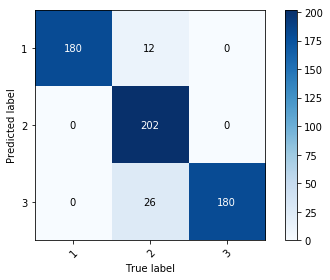

[0.9366666666666666, 'RGB,SVM']
   avg_accuracy  remarks
0      0.936667  RGB,SVM
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 16, 16, 6)
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 13 13 13 13 1

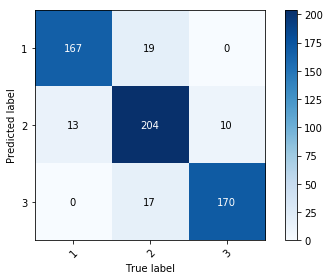

[0.9016666666666666, 'RGB,Random Forest']
   avg_accuracy            remarks
0      0.901667  RGB,Random Forest


In [92]:
print ("For RGB color space")
Ltrain,Vtrain= load_RGB_train()
Ltest,Vtest=load_RGB_test()
accuracy_score_RGB =Logistic_Regression(Ltrain, Vtrain,Ltest, Vtest, colorspace ="RGB")
save_csv(accuracy_score_RGB,'test_downsampled_image.csv','RGB,Logistic Regression')

Ltrain,Vtrain= load_RGB_train()
Ltest,Vtest=load_RGB_test()
accuracy_score_RGB =SVM(Ltrain, Vtrain,Ltest, Vtest, colorspace ="RGB")
save_csv(accuracy_score_RGB,'test_downsampled_image.csv','RGB,SVM')

Ltrain,Vtrain= load_RGB_train()
Ltest,Vtest=load_RGB_test()
accuracy_score_RGB =Random_Forrest(Ltrain, Vtrain,Ltest, Vtest, colorspace ="RGB")
save_csv(accuracy_score_RGB,'test_downsampled_image.csv','RGB,Random Forest')




For HSV color space
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12

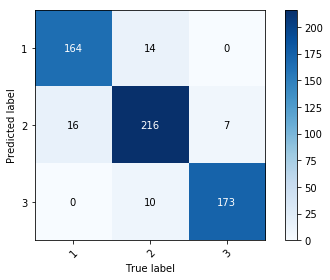

[0.9216666666666666, 'HSV,Logistic Regression']
   avg_accuracy                  remarks
0      0.921667  HSV,Logistic Regression
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11

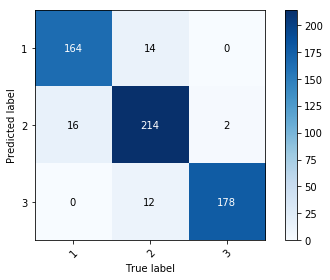

[0.9266666666666666, 'HSV,SVM']
   avg_accuracy  remarks
0      0.926667  HSV,SVM
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 13 13 13 13 13 13 13 13 13 13 1

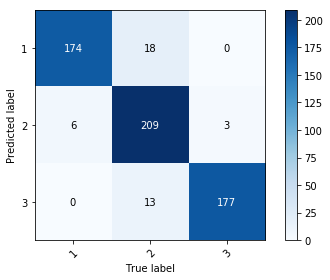

[0.9333333333333333, 'HSV,Random Forest']
   avg_accuracy            remarks
0      0.933333  HSV,Random Forest


In [93]:
print ("For HSV color space")
Ltrain,Vtrain= load_HSV_train()
Ltest,Vtest=load_HSV_test()
accuracy_score_HSV =Logistic_Regression(Ltrain, Vtrain,Ltest, Vtest, colorspace ="HSV")
save_csv(accuracy_score_HSV,'test_downsampled_image.csv','HSV,Logistic Regression')

Ltrain,Vtrain= load_HSV_train()
Ltest,Vtest=load_HSV_test()
accuracy_score_HSV =SVM(Ltrain, Vtrain,Ltest, Vtest, colorspace ="HSV")
save_csv(accuracy_score_HSV,'test_downsampled_image.csv','HSV,SVM')

Ltrain,Vtrain= load_HSV_train()
Ltest,Vtest=load_HSV_test()
accuracy_score_HSV =Random_Forrest(Ltrain, Vtrain,Ltest, Vtest, colorspace ="HSV")
save_csv(accuracy_score_HSV,'test_downsampled_image.csv','HSV,Random Forest')

For LAB color space
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12

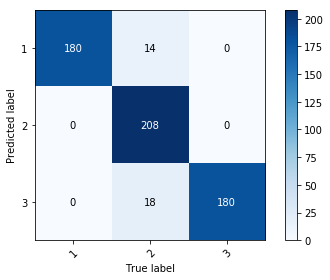

[0.9466666666666667, 'LAB,Logistic Regression']
   avg_accuracy                  remarks
0      0.946667  LAB,Logistic Regression
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11

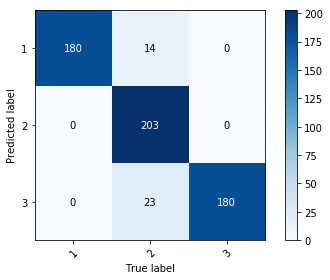

[0.9383333333333334, 'LAB,SVM']
   avg_accuracy  remarks
0      0.938333  LAB,SVM
0       11
1       11
2       11
3       11
4       11
5       11
6       11
7       11
8       11
9       11
10      11
11      11
12      11
13      11
14      11
15      11
16      11
17      11
18      11
19      11
20      11
21      11
22      11
23      11
24      11
25      11
26      11
27      11
28      11
29      11
        ..
2322    11
2323    11
2324    11
2325    11
2326    11
2327    11
2328    11
2329    11
2330    11
2331    11
2332    11
2333    11
2334    11
2335    11
2336    11
2337    11
2338    11
2339    11
2340    11
2341    13
2342    12
2343    12
2344    12
2345    12
2346    12
2347    12
2348    12
2349    12
2350    12
2351    12
Name: Dilution Factor, Length: 2352, dtype: int64
(2352, 1536)
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 13 13 13 13 13 13 13 13 13 13 1

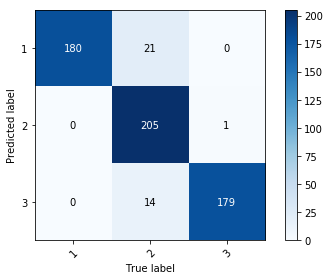

[0.94, 'LAB,Random Forest']
   avg_accuracy            remarks
0          0.94  LAB,Random Forest


In [94]:
print ("For LAB color space")
Ltrain,Vtrain= load_LAB_train()
Ltest,Vtest=load_LAB_test()
accuracy_score_LAB =Logistic_Regression(Ltrain, Vtrain,Ltest, Vtest, colorspace ="LAB")
save_csv(accuracy_score_LAB,'test_downsampled_image.csv','LAB,Logistic Regression')

Ltrain,Vtrain= load_LAB_train()
Ltest,Vtest=load_LAB_test()
accuracy_score_LAB =SVM(Ltrain, Vtrain,Ltest, Vtest, colorspace ="LAB")
save_csv(accuracy_score_LAB,'test_downsampled_image.csv','LAB,SVM')

Ltrain,Vtrain= load_LAB_train()
Ltest,Vtest=load_LAB_test()
accuracy_score_LAB =Random_Forrest(Ltrain, Vtrain,Ltest, Vtest, colorspace ="LAB")
save_csv(accuracy_score_LAB,'test_downsampled_image.csv','LAB,Random Forest')

For RGB color space


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       180
           2       0.96      0.87      0.91       240
           3       0.85      0.99      0.92       180

   micro avg       0.93      0.93      0.93       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.93      0.93       600

Confusion matrix, without normalization


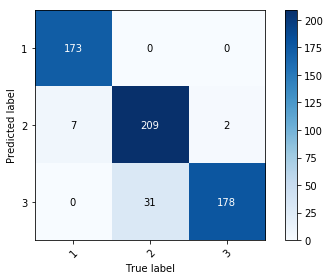

[0.9333333333333333, 'RGB,Logistic Regression']
   avg_accuracy                  remarks
0      0.933333  RGB,Logistic Regression


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.9366666666666666
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       180
           2       0.97      0.87      0.92       240
           3       0.85      1.00      0.92       180

   micro avg       0.94      0.94      0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

Confusion matrix, without normalization


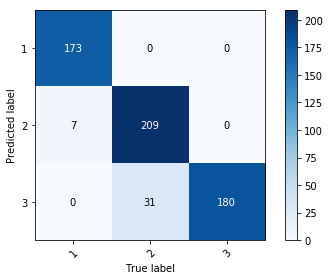

[0.9366666666666666, 'RGB,SVM']
   avg_accuracy  remarks
0      0.936667  RGB,SVM


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy Score:  0.8983333333333333
              precision    recall  f1-score   support

           1       0.94      0.94      0.94       180
           2       0.91      0.83      0.87       240
           3       0.85      0.94      0.89       180

   micro avg       0.90      0.90      0.90       600
   macro avg       0.90      0.91      0.90       600
weighted avg       0.90      0.90      0.90       600

Confusion matrix, without normalization


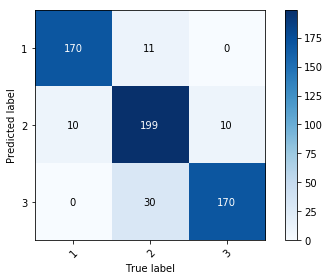

[0.8983333333333333, 'RGB,Random Forest']
   avg_accuracy            remarks
0      0.898333  RGB,Random Forest


In [95]:
print ("For RGB color space")
Ltrain,Vtrain= load_RGB_train_mean()
Ltest,Vtest=load_RGB_test_mean()
accuracy_score_RGB =Logistic_Regression(Ltrain, Vtrain,Ltest, Vtest, colorspace ="RGB")
save_csv(accuracy_score_RGB,'test_mean_value.csv','RGB,Logistic Regression')

Ltrain,Vtrain= load_RGB_train_mean()
Ltest,Vtest=load_RGB_test_mean()
accuracy_score_RGB =SVM(Ltrain, Vtrain,Ltest, Vtest, colorspace ="RGB")
save_csv(accuracy_score_RGB,'test_mean_value.csv','RGB,SVM')

Ltrain,Vtrain= load_RGB_train_mean()
Ltest,Vtest=load_RGB_test_mean()
accuracy_score_RGB =Random_Forrest(Ltrain, Vtrain,Ltest, Vtest, colorspace ="RGB")
save_csv(accuracy_score_RGB,'test_mean_value.csv','RGB,Random Forest')


For HSV color space


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.9366666666666666
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       180
           2       0.96      0.88      0.92       240
           3       0.86      0.99      0.92       180

   micro avg       0.94      0.94      0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

Confusion matrix, without normalization


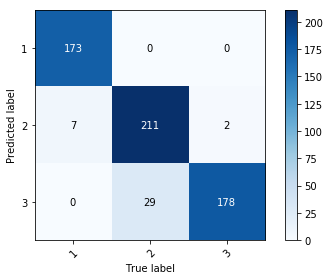

[0.9366666666666666, 'HSV,Logistic Regression']
   avg_accuracy                  remarks
0      0.936667  HSV,Logistic Regression


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.9416666666666667
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       180
           2       0.97      0.88      0.92       240
           3       0.86      1.00      0.93       180

   micro avg       0.94      0.94      0.94       600
   macro avg       0.94      0.95      0.94       600
weighted avg       0.95      0.94      0.94       600

Confusion matrix, without normalization


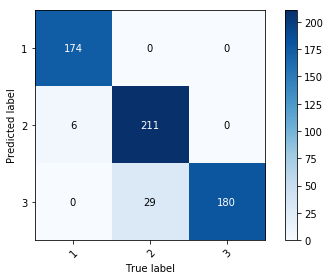

[0.9416666666666667, 'HSV,SVM']
   avg_accuracy  remarks
0      0.941667  HSV,SVM


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy Score:  0.915
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       180
           2       0.94      0.84      0.89       240
           3       0.87      0.98      0.92       180

   micro avg       0.92      0.92      0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.91       600

Confusion matrix, without normalization


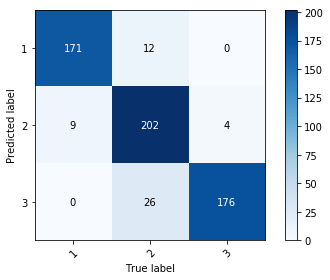

[0.915, 'HSV,Random Forest']
   avg_accuracy            remarks
0         0.915  HSV,Random Forest


In [96]:
print ("For HSV color space")
Ltrain,Vtrain= load_HSV_train_mean()
Ltest,Vtest=load_HSV_test_mean()
accuracy_score_HSV =Logistic_Regression(Ltrain, Vtrain,Ltest, Vtest, colorspace ="HSV")
save_csv(accuracy_score_HSV,'test_mean_value.csv','HSV,Logistic Regression')

Ltrain,Vtrain= load_HSV_train_mean()
Ltest,Vtest=load_HSV_test_mean()
accuracy_score_HSV =SVM(Ltrain, Vtrain,Ltest, Vtest, colorspace ="HSV")
save_csv(accuracy_score_HSV,'test_mean_value.csv','HSV,SVM')

Ltrain,Vtrain= load_HSV_train_mean()
Ltest,Vtest=load_HSV_test_mean()
accuracy_score_HSV =Random_Forrest(Ltrain, Vtrain,Ltest, Vtest, colorspace ="HSV")
save_csv(accuracy_score_HSV,'test_mean_value.csv','HSV,Random Forest')


For LAB color space


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.9283333333333333
              precision    recall  f1-score   support

           1       1.00      0.94      0.97       180
           2       0.94      0.88      0.91       240
           3       0.86      0.99      0.92       180

   micro avg       0.93      0.93      0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

Confusion matrix, without normalization


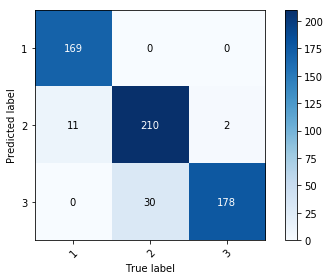

[0.9283333333333333, 'LAB,Logistic Regression']
   avg_accuracy                  remarks
0      0.928333  LAB,Logistic Regression


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:  0.9366666666666666
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       180
           2       0.96      0.88      0.92       240
           3       0.86      0.99      0.92       180

   micro avg       0.94      0.94      0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

Confusion matrix, without normalization


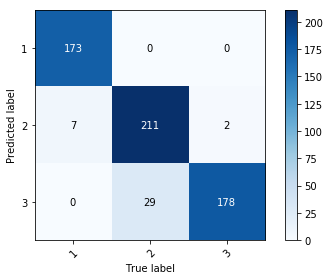

[0.9366666666666666, 'LAB,SVM']
   avg_accuracy  remarks
0      0.936667  LAB,SVM


C:\Users\Brinda Khanal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy Score:  0.9283333333333333
              precision    recall  f1-score   support

           1       0.96      0.95      0.95       180
           2       0.94      0.88      0.91       240
           3       0.89      0.98      0.93       180

   micro avg       0.93      0.93      0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

Confusion matrix, without normalization


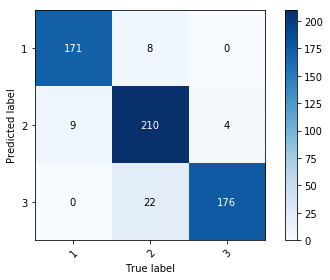

[0.9283333333333333, 'LAB,Random Forest']
   avg_accuracy            remarks
0      0.928333  LAB,Random Forest


In [97]:
print ("For LAB color space")
Ltrain,Vtrain= load_LAB_train_mean()
Ltest,Vtest=load_LAB_test_mean()
accuracy_score_LAB =Logistic_Regression(Ltrain, Vtrain,Ltest, Vtest, colorspace ="LAB")
save_csv(accuracy_score_LAB,'test_mean_value.csv','LAB,Logistic Regression')

Ltrain,Vtrain= load_LAB_train_mean()
Ltest,Vtest=load_LAB_test_mean()
accuracy_score_LAB =SVM(Ltrain, Vtrain,Ltest, Vtest, colorspace ="LAB")
save_csv(accuracy_score_LAB,'test_mean_value.csv','LAB,SVM')

Ltrain,Vtrain= load_LAB_train_mean()
Ltest,Vtest=load_LAB_test_mean()
accuracy_score_LAB =Random_Forrest(Ltrain, Vtrain,Ltest, Vtest, colorspace ="LAB")
save_csv(accuracy_score_LAB,'test_mean_value.csv','LAB,Random Forest')
